In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import PIL
import seaborn as sns
import plotly
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from plotly.offline import iplot, init_notebook_mode
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from IPython.display import display
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import PIL
import seaborn as sns
import plotly
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from plotly.offline import iplot, init_notebook_mode
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from IPython.display import display
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler

Number of train images 3662
Number of train images 3662


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:ylabel='count'>

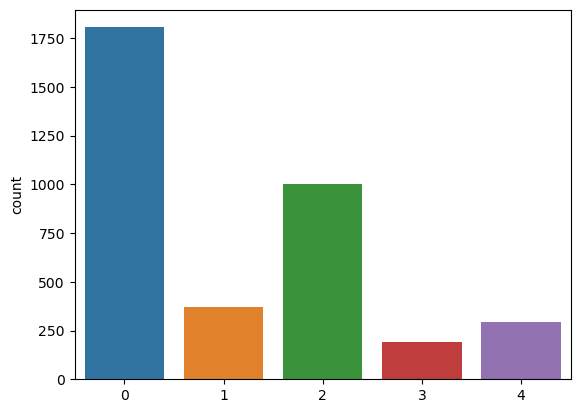

In [2]:
from numpy import append



train=[]

label=[]
for i in os.listdir(r"C:\Users\Priyadharshan\Downloads\final year dox\nalaiyathiran\archive\preprocessed dataset\preprocessed dataset\training"):
    train_class=os.listdir(os.path.join(r"C:\Users\Priyadharshan\Downloads\final year dox\nalaiyathiran\archive\preprocessed dataset\preprocessed dataset\training",i))
    for j in train_class:
        img=os.path.join('training',i,j)
        train.append(img)
        label.append(i)

        
print(f"Number of train images {len(train)}")
print(f"Number of train images {len(label)}")
sns.countplot(label)



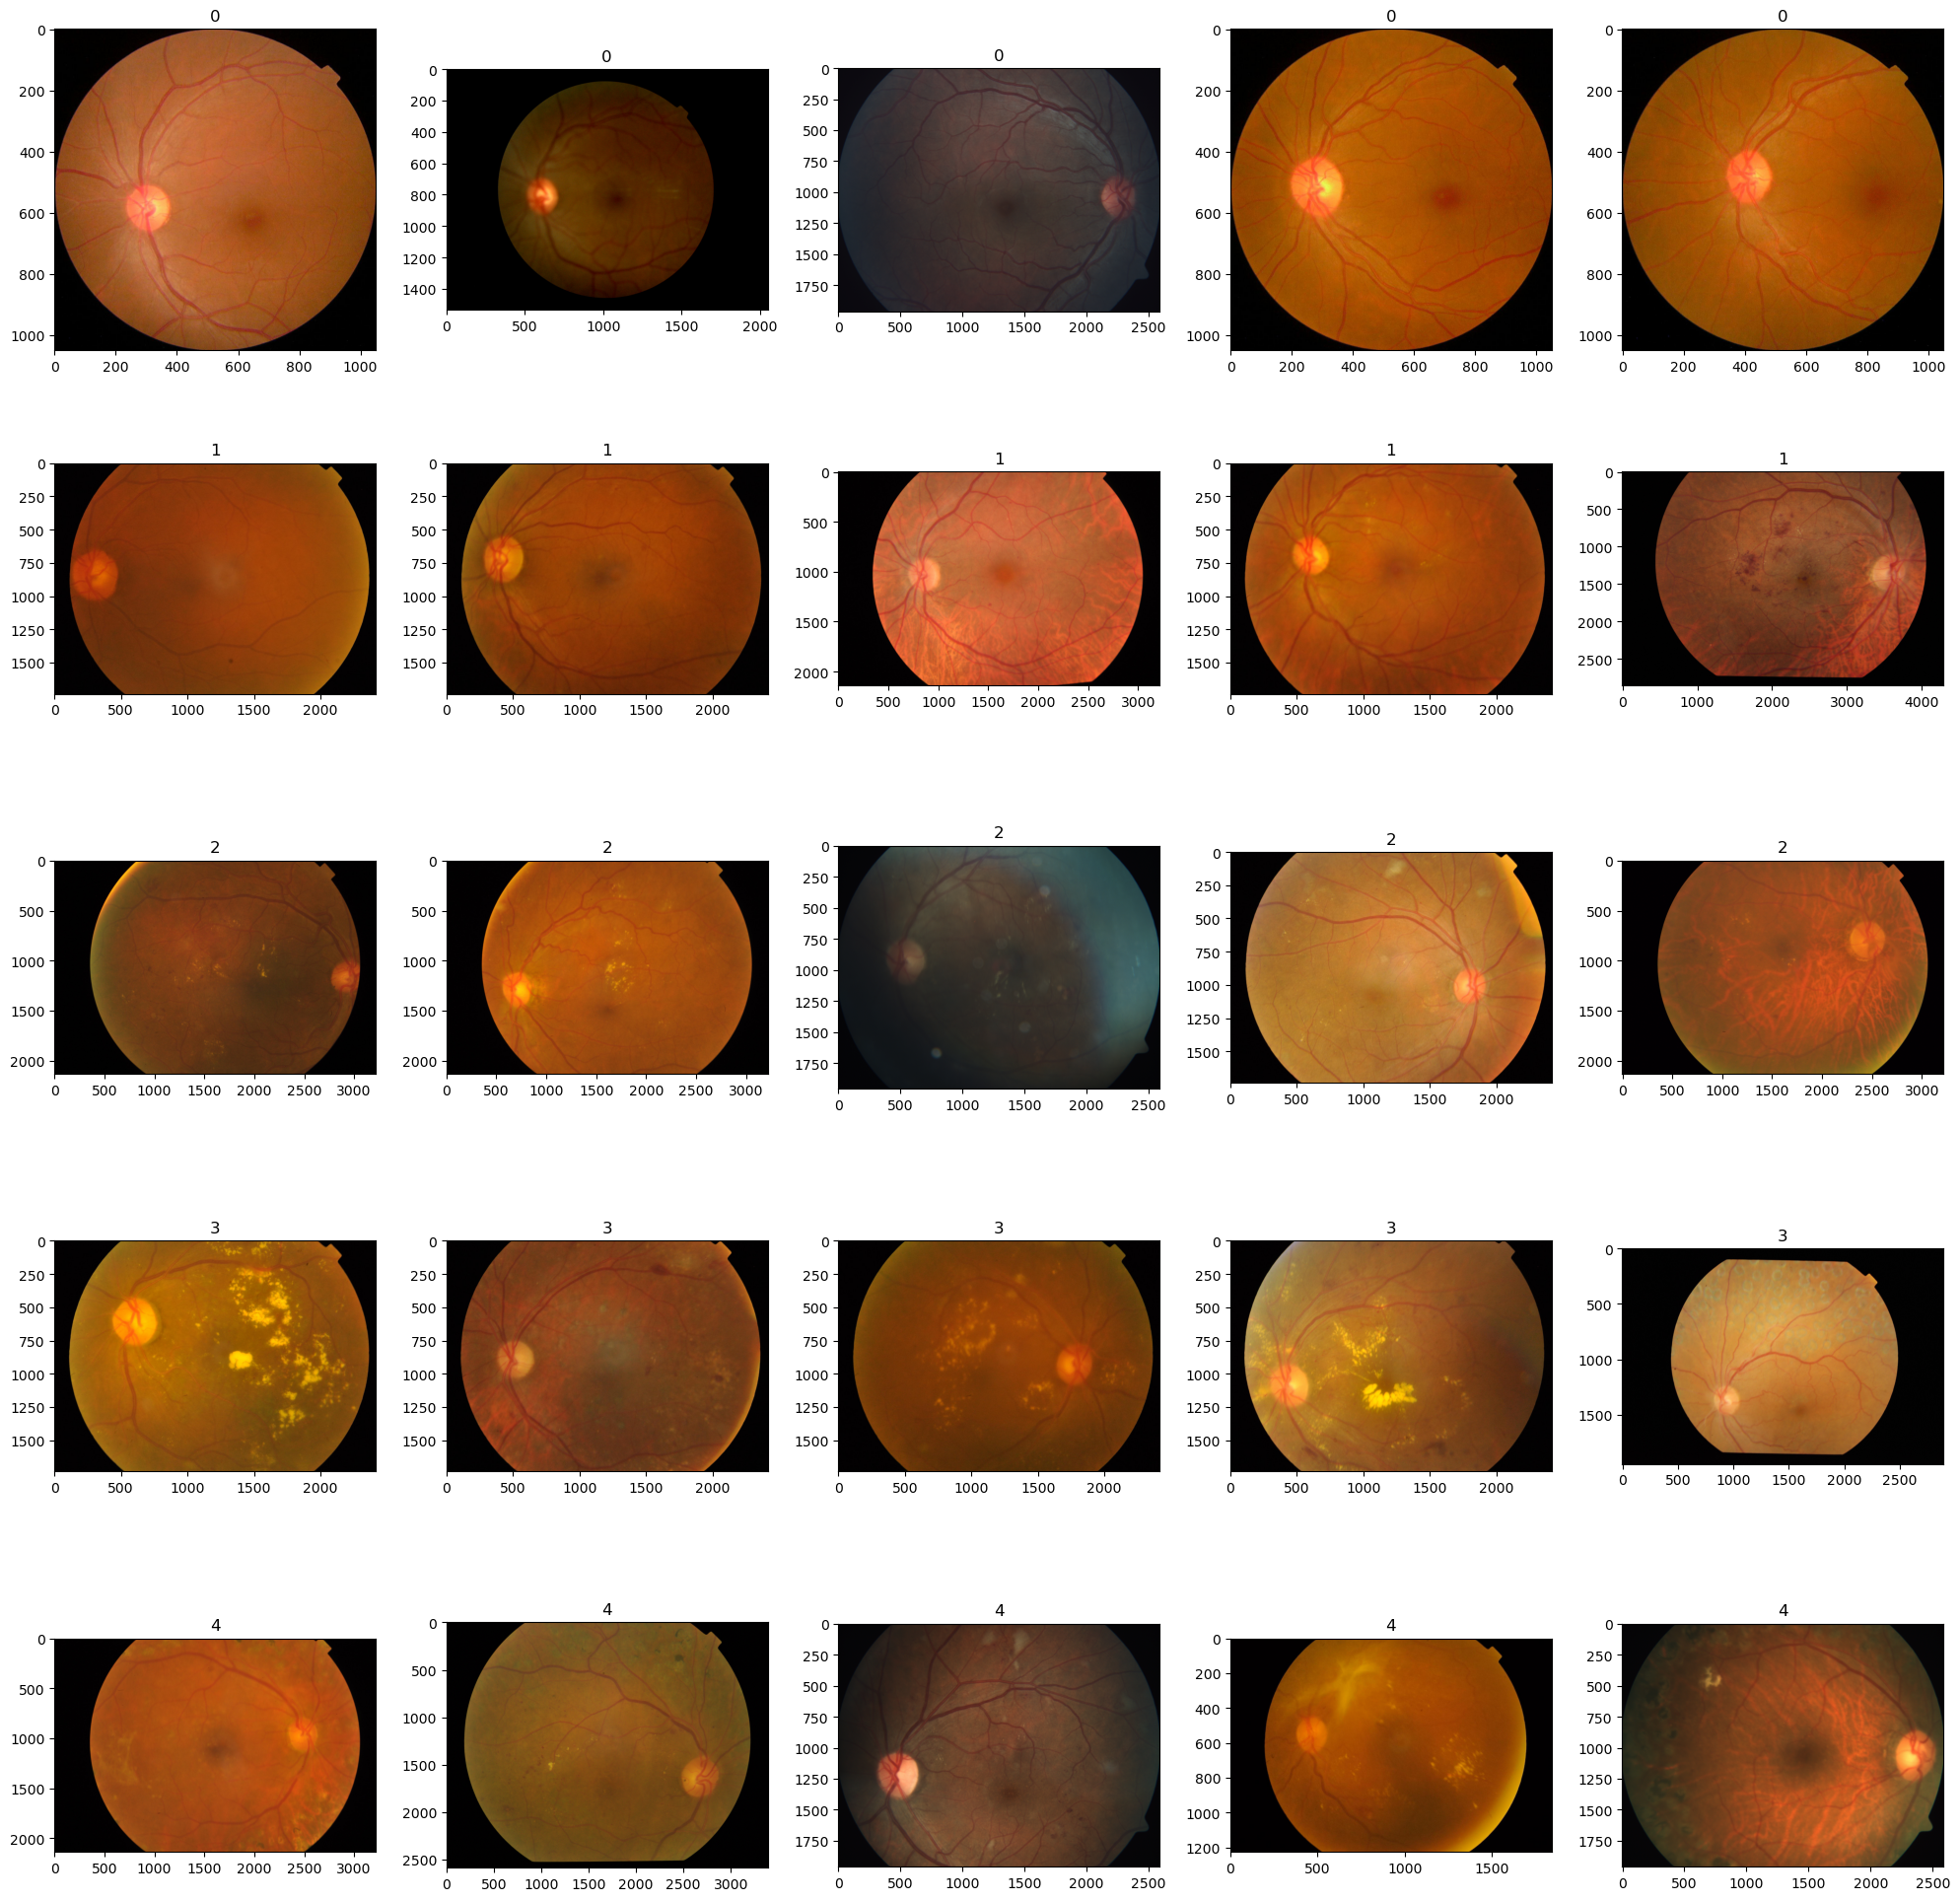

In [3]:
fig,axs=plt.subplots(5,5,figsize=(20,20))
count=0
for i in os.listdir(r"C:\Users\Priyadharshan\Downloads\final year dox\nalaiyathiran\archive\preprocessed dataset\preprocessed dataset\training"):
  train_class=os.listdir(os.path.join(r"C:\Users\Priyadharshan\Downloads\final year dox\nalaiyathiran\archive\preprocessed dataset\preprocessed dataset\training",i))
  for j in range(5):
    img=os.path.join(r"C:\Users\Priyadharshan\Downloads\final year dox\nalaiyathiran\archive\preprocessed dataset\preprocessed dataset\training",i,train_class[j])
    img=PIL.Image.open(img)
    axs[count][j].title.set_text(i)
    axs[count][j].imshow(img)
  count=count+1
fig.tight_layout()


In [4]:
no_of_images_in_class=[]
class_name=[]
for i in os.listdir(r"C:\Users\Priyadharshan\Downloads\final year dox\nalaiyathiran\archive\preprocessed dataset\preprocessed dataset\training"):
  train_class=os.listdir(os.path.join(r"C:\Users\Priyadharshan\Downloads\final year dox\nalaiyathiran\archive\preprocessed dataset\preprocessed dataset\training",i))
  no_of_images_in_class.append(len(train_class))
  class_name.append(i)
  print(f'no of image in {i} is {len(train_class)}')

  

no of image in 0 is 1805
no of image in 1 is 370
no of image in 2 is 999
no of image in 3 is 193
no of image in 4 is 295


In [5]:
retina_df=pd.DataFrame({'Image':train,'Labels':label})
retina_df

Image Labels
0     training\0\002c21358ce6.png      0
1     training\0\005b95c28852.png      0
2     training\0\0097f532ac9f.png      0
3     training\0\00cc2b75cddd.png      0
4     training\0\00f6c1be5a33.png      0
...                           ...    ...
3657  training\4\fa59221cf464.png      4
3658  training\4\fb696a8e055a.png      4
3659  training\4\fce93caa4758.png      4
3660  training\4\fdd534271f3d.png      4
3661  training\4\ff8a0b45c789.png      4

[3662 rows x 2 columns]

([<matplotlib.patches.Wedge at 0x285a485b730>,
 [Text(0.024533653067266015, 1.0997263749984245, '0'),
  Text(-1.0593196619831637, -0.29638126414447286, '1'),
  Text(-0.13554444257363468, -1.0916170134655299, '2'),
  Text(0.8610223192730306, -0.6845732727135142, '3'),
  Text(1.0649610805536351, -0.2754231234047608, '4')],
 [Text(0.013381992582145097, 0.5998507499991406, '49.3%'),
  Text(-0.5778107247180893, -0.161662507715167, '10.1%'),
  Text(-0.07393333231289163, -0.595427461890289, '27.3%'),
  Text(0.46964853778528937, -0.37340360329828043, '5.3%'),
  Text(0.5808878621201645, -0.15023079458441493, '8.1%')])

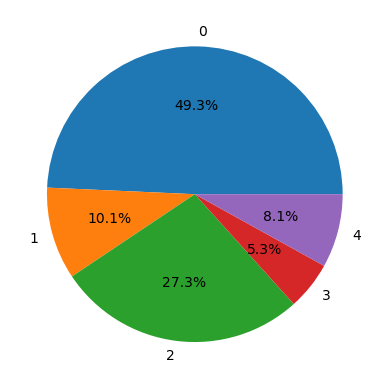

In [6]:
fig1,ax1=plt.subplots()
ax1.pie(no_of_images_in_class,labels=class_name,autopct='%1.1f%%')


In [7]:
retina_df=shuffle(retina_df)
train,test=train_test_split(retina_df,test_size=0.2)

In [8]:
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        vertical_flip=True,
        horizontal_flip=True,
        rotation_range=360,
        shear_range = 0.2,
        validation_split = 0.15
        )

test_datagen = ImageDataGenerator(rescale = 1./255)

In [9]:
train_generator = train_datagen.flow_from_dataframe(
    train,
    directory=r"C:\Users\Priyadharshan\Downloads\final year dox\nalaiyathiran\archive\preprocessed dataset\preprocessed dataset",
    x_col="Image",
    y_col="Labels",
    
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=8,
    subset='training')

validation_generator = train_datagen.flow_from_dataframe(
    train,
    directory=r"C:\Users\Priyadharshan\Downloads\final year dox\nalaiyathiran\archive\preprocessed dataset\preprocessed dataset",
    x_col="Image",
    y_col="Labels",
 
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=8,
    subset='validation')

test_generator = test_datagen.flow_from_dataframe(
    test,
    directory=r"C:\Users\Priyadharshan\Downloads\final year dox\nalaiyathiran\archive\preprocessed dataset\preprocessed dataset",
    x_col="Image",
    y_col="Labels",

    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=1)

Found 2490 validated image filenames belonging to 5 classes.
Found 439 validated image filenames belonging to 5 classes.
Found 733 validated image filenames belonging to 5 classes.


# **CNN WITH DenseNet201**

In [10]:

from tensorflow.keras.applications import  ResNet152V2

model = ResNet152V2(
      input_shape = (224,224,3),
      include_top = False,
      weights = 'imagenet'
    )

In [11]:
for layer in model.layers:
    layer.trainable = False
for i in range(-2, 0):
    model.layers[i].trainable = True



In [15]:
from keras.layers import  Dropout

from keras.layers import  Flatten
from keras.layers import  Dense
from tensorflow.keras.optimizers import SGD

    
sgd = SGD(learning_rate=1e-3 * 4, decay=1e-6, momentum=0.9, nesterov=True)

x = Flatten()(model.output)
x =Dense(5, activation = 'softmax')(x)

model = keras.Model(model.input, x, name="ResNet152V2")
model.compile(loss = "categorical_crossentropy", optimizer = 'sgd', metrics = ["accuracy"])
model.summary()

Model: "ResNet152V2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                        

# **Training Model**

In [16]:

history = model.fit(train_generator, steps_per_epoch = train_generator.n // 8, epochs = 5, validation_data= validation_generator, validation_steps= validation_generator.n // 8, ).history
model.save(filepath=r"C:\Users\Priyadharshan\Downloads\diabetic-retinopathy-detection\ResNet152V2.tf",save_format='tf')

Epoch 1/5
311/311 [==============================] - 279s 874ms/step - loss: 1.4874 - accuracy: 0.4214 - val_loss: 1.2012 - val_accuracy: 0.7083
Epoch 2/5
311/311 [==============================] - 252s 810ms/step - loss: 1.0643 - accuracy: 0.7099 - val_loss: 1.0096 - val_accuracy: 0.7130
Epoch 3/5
311/311 [==============================] - 250s 804ms/step - loss: 0.9456 - accuracy: 0.7139 - val_loss: 0.9353 - val_accuracy: 0.7176
Epoch 4/5
311/311 [==============================] - 261s 839ms/step - loss: 0.9084 - accuracy: 0.7143 - val_loss: 0.9254 - val_accuracy: 0.7153
Epoch 5/5
311/311 [==============================] - 256s 825ms/step - loss: 0.8794 - accuracy: 0.7131 - val_loss: 0.9016 - val_accuracy: 0.7106


INFO:tensorflow:Assets written to: C:\Users\Priyadharshan\Downloads\diabetic-retinopathy-detection\ResNet152V2.tf\assets


INFO:tensorflow:Assets written to: C:\Users\Priyadharshan\Downloads\diabetic-retinopathy-detection\ResNet152V2.tf\assets


In [17]:
loaded_model = tf.keras.models.load_model(filepath=r"C:\Users\Priyadharshan\Downloads\diabetic-retinopathy-detection\ResNet152V2.tf")

In [18]:
for layer in model.layers:
    layer.trainable = True

In [19]:
from tensorflow.keras.optimizers import SGD

    
sgd = SGD(learning_rate=1e-5 * 4, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss = "categorical_crossentropy", optimizer = 'sgd', metrics = ["accuracy"])
model.summary()

Model: "ResNet152V2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                        

In [20]:
earlystopping = EarlyStopping(monitor='val_accuracy', mode='max', restore_best_weights=True, verbose=2, patience=15)

#save the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath=r"C:\Users\Priyadharshan\Downloads\diabetic-retinopathy-detection\ResNet152V2_modal.h5",monitor='val_accuracy', verbose=2, mode="max",save_best_only=True)

In [21]:
final_history = loaded_model.fit(train_generator, steps_per_epoch = train_generator.n // 8, epochs = 50, validation_data= validation_generator, validation_steps= validation_generator.n // 8, callbacks=[checkpointer , earlystopping]).history
model.save(filepath=r"C:\Users\Priyadharshan\Downloads\diabetic-retinopathy-detection\ResNet152V2_2.tf",save_format='tf')

Epoch 1/50
311/311 [==============================] - ETA: 0s - loss: 0.8590 - accuracy: 0.7164
Epoch 1: val_accuracy improved from -inf to 0.72685, saving model to C:\Users\Priyadharshan\Downloads\diabetic-retinopathy-detection\ResNet152V2_modal.h5
311/311 [==============================] - 286s 894ms/step - loss: 0.8590 - accuracy: 0.7164 - val_loss: 0.8838 - val_accuracy: 0.7269
Epoch 2/50
311/311 [==============================] - ETA: 0s - loss: 0.8569 - accuracy: 0.7192
Epoch 2: val_accuracy did not improve from 0.72685
311/311 [==============================] - 263s 846ms/step - loss: 0.8569 - accuracy: 0.7192 - val_loss: 0.8524 - val_accuracy: 0.7245
Epoch 3/50
311/311 [==============================] - ETA: 0s - loss: 0.8648 - accuracy: 0.7099
Epoch 3: val_accuracy did not improve from 0.72685
311/311 [==============================] - 252s 812ms/step - loss: 0.8648 - accuracy: 0.7099 - val_loss: 0.8552 - val_accuracy: 0.7269
Epoch 4/50
311/311 [==============================]

INFO:tensorflow:Assets written to: C:\Users\Priyadharshan\Downloads\diabetic-retinopathy-detection\ResNet152V2_2.tf\assets


INFO:tensorflow:Assets written to: C:\Users\Priyadharshan\Downloads\diabetic-retinopathy-detection\ResNet152V2_2.tf\assets


In [150]:
print(final_history.get('accuracy'))

[0.4633360207080841, 0.5547945499420166, 0.5640612244606018, 0.6156325340270996, 0.6220789551734924, 0.6216760873794556, 0.6208702921867371, 0.6514907479286194, 0.6462530493736267, 0.6361805200576782, 0.6394037008285522, 0.6277195811271667, 0.6611603498458862, 0.6647864580154419, 0.6696212887763977, 0.6631748676300049, 0.665995180606842, 0.6780821681022644, 0.6813054084777832, 0.6571313738822937]


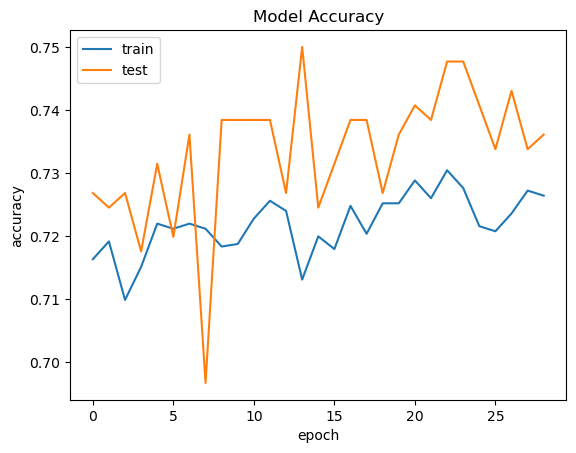

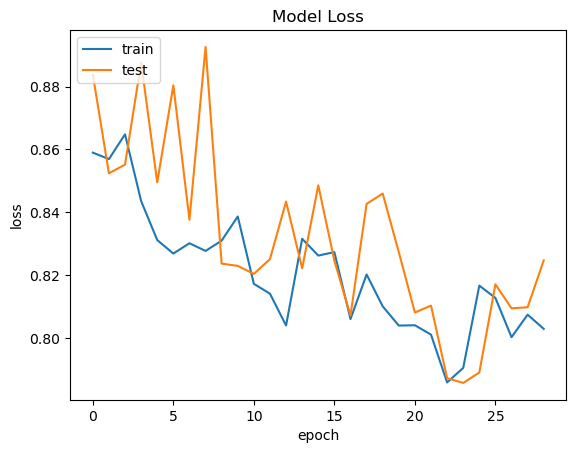

In [22]:
# summarize history for accuracy
plt.plot(final_history.get('accuracy'))
plt.plot(final_history.get('val_accuracy'))
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(final_history.get('loss'))
plt.plot(final_history.get('val_loss'))
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

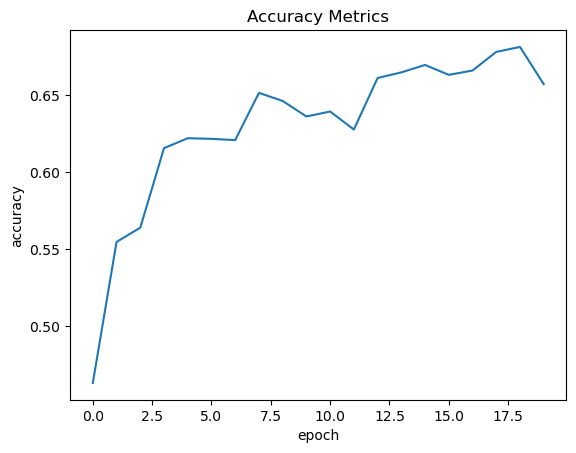

: 

In [157]:
plt.plot(final_history.get('accuracy'))
plt.title('Accuracy Metrics')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

# **performance**

In [23]:
model.load_weights(filepath=r"C:\Users\Priyadharshan\Downloads\diabetic-retinopathy-detection\ResNet152V2_modal.h5")

In [24]:
# Evaluate the performance of the model
evaluate = model.evaluate(test_generator, steps = test_generator.n // 8, verbose =1)

print('Accuracy Test : {}'.format(evaluate[1]*100))

91/91 [==============================] - 12s 91ms/step - loss: 0.7523 - accuracy: 0.7912
Accuracy Test : 79.1208803653717


# **ENSEMBLE1**

In [20]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Average
from tensorflow.keras.optimizers import SGD

sgd = SGD(learning_rate=1e-5 * 4, decay=1e-6, momentum=0.9, nesterov=True)
model_1 = load_model(r"C:\Users\Priyadharshan\Downloads\diabetic-retinopathy-detection\VGG16.h5")
model_1 = Model(inputs=model_1.inputs,
                outputs=model_1.outputs,
                name='name_of_model_1')
model_2 = load_model(r"C:\Users\Priyadharshan\Downloads\diabetic-retinopathy-detection\VGG19_modal.h5")
model_2 = Model(inputs=model_2.inputs,
                outputs=model_2.outputs,
                name='name_of_model_2')
model_3 = load_model(r"C:\Users\Priyadharshan\Downloads\diabetic-retinopathy-detection\ResNet101V2_modal.h5")
model_3 = Model(inputs=model_3.inputs,
                outputs=model_3.outputs,
                name='name_of_model_3')
model_4 = load_model(r"C:\Users\Priyadharshan\Downloads\diabetic-retinopathy-detection\ResNet152V2_modal.h5")
model_4 = Model(inputs=model_4.inputs,
                outputs=model_4.outputs,
                name='name_of_model_4')
models = [model_1, model_2, model_3, model_4]
model_input = Input(shape=(224, 224, 3))
model_outputs = [model(model_input) for model in models]
ensemble_output = Average()(model_outputs)
ensemble_model = Model(inputs=model_input, outputs=ensemble_output, name='ensemble')
ensemble_model.compile(loss = "categorical_crossentropy", optimizer = 'sgd', metrics = ["accuracy"])

In [21]:
earlystopping = EarlyStopping(monitor='val_accuracy', mode='max', restore_best_weights=True, verbose=2, patience=15)

#save the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath=r"C:\Users\Priyadharshan\Downloads\diabetic-retinopathy-detection\ensemble.h5",monitor='val_accuracy', verbose=2, mode="max",save_best_only=True)

In [22]:
final_history = ensemble_model.fit(train_generator, steps_per_epoch = train_generator.n // 8, epochs = 50, validation_data= validation_generator, validation_steps= validation_generator.n // 8, callbacks=[checkpointer , earlystopping]).history
ensemble_model.save(filepath=r"C:\Users\Priyadharshan\Downloads\diabetic-retinopathy-detection\ensemble.tf",save_format='tf')

Epoch 1/50
311/311 [==============================] - ETA: 0s - loss: 0.6328 - accuracy: 0.7748
Epoch 1: val_accuracy improved from -inf to 0.78009, saving model to C:\Users\Priyadharshan\Downloads\diabetic-retinopathy-detection\ensemble.h5
311/311 [==============================] - 274s 838ms/step - loss: 0.6328 - accuracy: 0.7748 - val_loss: 0.6379 - val_accuracy: 0.7801
Epoch 2/50
311/311 [==============================] - ETA: 0s - loss: 0.6132 - accuracy: 0.7828
Epoch 2: val_accuracy improved from 0.78009 to 0.79630, saving model to C:\Users\Priyadharshan\Downloads\diabetic-retinopathy-detection\ensemble.h5
311/311 [==============================] - 262s 843ms/step - loss: 0.6132 - accuracy: 0.7828 - val_loss: 0.6341 - val_accuracy: 0.7963
Epoch 3/50
311/311 [==============================] - ETA: 0s - loss: 0.6171 - accuracy: 0.7748
Epoch 3: val_accuracy did not improve from 0.79630
311/311 [==============================] - 256s 821ms/step - loss: 0.6171 - accuracy: 0.7748 - val

NameError: name 'model' is not defined

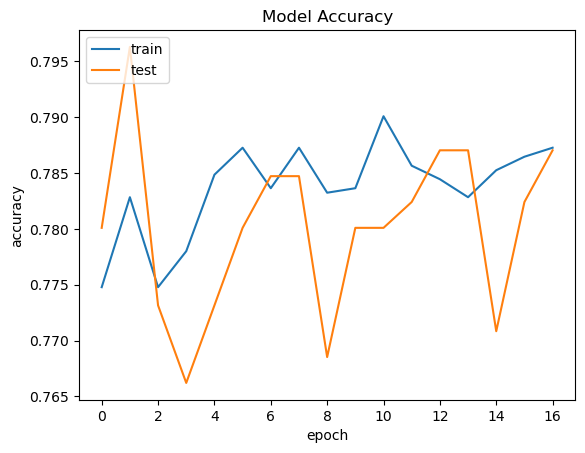

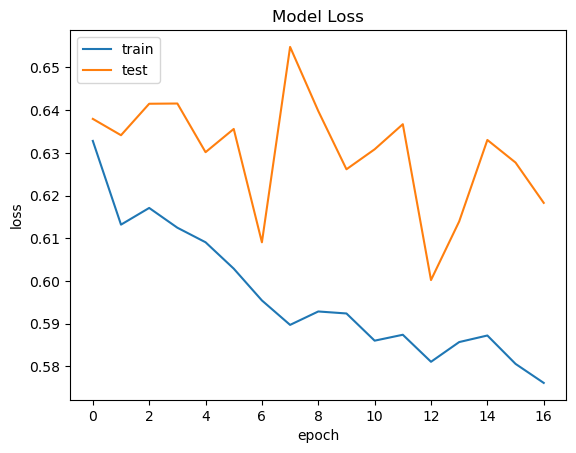

In [23]:
plt.plot(final_history.get('accuracy'))
plt.plot(final_history.get('val_accuracy'))
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(final_history.get('loss'))
plt.plot(final_history.get('val_loss'))
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
ensemble_model.load_weights(filepath=r"C:\Users\Priyadharshan\Downloads\diabetic-retinopathy-detection\ensemble.h5")

In [32]:
evaluate = ensemble_model.evaluate(test_generator, steps = test_generator.n // 8, verbose =1)

print('Accuracy Test : {}'.format(evaluate[1]*100))

91/91 [==============================] - 8s 90ms/step - loss: 0.5119 - accuracy: 0.8352
Accuracy Test : 83.51648449897766


# **ENSEMBLE2**

In [14]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Average
from tensorflow.keras.optimizers import SGD

sgd = SGD(learning_rate=1e-5 * 9, decay=1e-6, momentum=0.9, nesterov=True)
model_1 = load_model(r"C:\Users\Priyadharshan\Downloads\diabetic-retinopathy-detection\VGG16.h5")
model_1 = Model(inputs=model_1.inputs,
                outputs=model_1.outputs,
                name='name_of_model_1')
model_2 = load_model(r"C:\Users\Priyadharshan\Downloads\diabetic-retinopathy-detection\VGG19_modal.h5")
model_2 = Model(inputs=model_2.inputs,
                outputs=model_2.outputs,
                name='name_of_model_2')
model_3 = load_model(r"C:\Users\Priyadharshan\Downloads\diabetic-retinopathy-detection\ResNet101V2_modal.h5")
model_3 = Model(inputs=model_3.inputs,
                outputs=model_3.outputs,
                name='name_of_model_3')
model_4 = load_model(r"C:\Users\Priyadharshan\Downloads\diabetic-retinopathy-detection\ResNet152V2_modal.h5")
model_4 = Model(inputs=model_4.inputs,
                outputs=model_4.outputs,
                name='name_of_model_4')
models = [model_1, model_2, model_3, model_4]
model_input = Input(shape=(224, 224, 3))
model_outputs = [model(model_input) for model in models]
ensemble_output = Average()(model_outputs)
ensemble_model1 = Model(inputs=model_input, outputs=ensemble_output, name='ensemble')
ensemble_model1.compile(loss = "categorical_crossentropy", optimizer = 'sgd', metrics = ["accuracy"])

In [15]:
earlystopping = EarlyStopping(monitor='val_accuracy', mode='max', restore_best_weights=True, verbose=2, patience=2)

#save the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath=r"C:\Users\Priyadharshan\Downloads\diabetic-retinopathy-detection\ensembletest.h5",monitor='val_accuracy', verbose=2, mode="max",save_best_only=True)

In [16]:
final_history = ensemble_model1.fit(train_generator, steps_per_epoch = train_generator.n // 8, epochs = 5, validation_data= validation_generator, validation_steps= validation_generator.n // 8, callbacks=[checkpointer , earlystopping]).history
ensemble_model1.save(filepath=r"C:\Users\Priyadharshan\Downloads\diabetic-retinopathy-detection\ensemble.tf",save_format='tf')

Epoch 1/5
311/311 [==============================] - ETA: 0s - loss: 0.6154 - accuracy: 0.7849
Epoch 1: val_accuracy improved from -inf to 0.78241, saving model to C:\Users\Priyadharshan\Downloads\diabetic-retinopathy-detection\ensembletest.h5
311/311 [==============================] - 271s 821ms/step - loss: 0.6154 - accuracy: 0.7849 - val_loss: 0.6696 - val_accuracy: 0.7824
Epoch 2/5
311/311 [==============================] - ETA: 0s - loss: 0.6012 - accuracy: 0.7861
Epoch 2: val_accuracy did not improve from 0.78241
311/311 [==============================] - 248s 795ms/step - loss: 0.6012 - accuracy: 0.7861 - val_loss: 0.6363 - val_accuracy: 0.7824
Epoch 3/5
311/311 [==============================] - ETA: 0s - loss: 0.6019 - accuracy: 0.7849
Epoch 3: val_accuracy did not improve from 0.78241
Restoring model weights from the end of the best epoch: 1.
311/311 [==============================] - 255s 821ms/step - loss: 0.6019 - accuracy: 0.7849 - val_loss: 0.6468 - val_accuracy: 0.7824


INFO:tensorflow:Assets written to: C:\Users\Priyadharshan\Downloads\diabetic-retinopathy-detection\ensemble.tf\assets


INFO:tensorflow:Assets written to: C:\Users\Priyadharshan\Downloads\diabetic-retinopathy-detection\ensemble.tf\assets


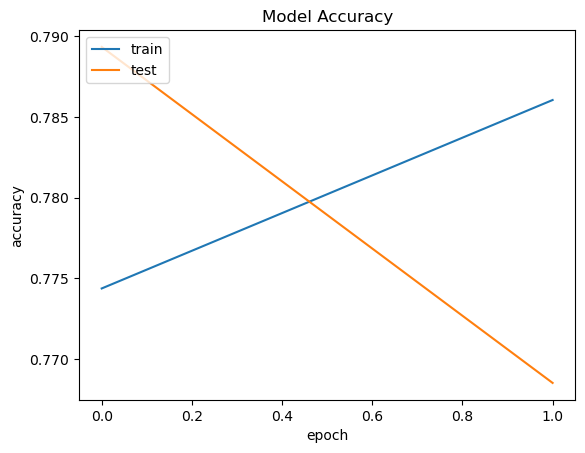

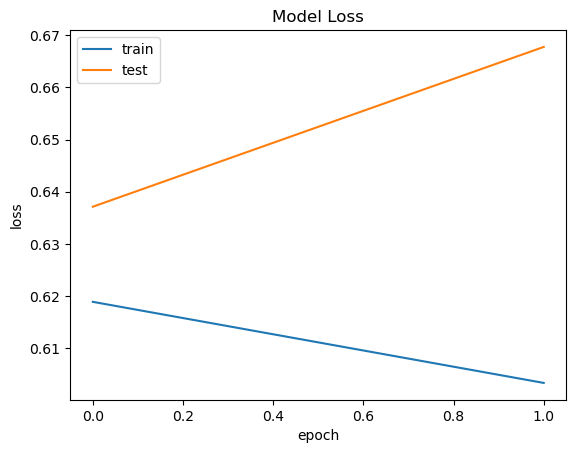

In [13]:
plt.plot(final_history.get('accuracy'))
plt.plot(final_history.get('val_accuracy'))
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(final_history.get('loss'))
plt.plot(final_history.get('val_loss'))
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
# Assigning label names to the corresponding indexes
labels = {0: 'Mild', 1: 'Moderate', 2: 'No_DR', 3:'Proliferate_DR', 4: 'Severe'}

In [ ]:
# Loading images and their predictions 

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import cv2

prediction = []
original = []
image = []
count = 0

for item in range(1):
  # code to open the image
  # img= PIL.Image.open(test['Image'].tolist()[item])
  img= PIL.Image.open('/content/drive/MyDrive/project/diabetic retinopathy/test/severe.png')
  # resizing the image to (256,256)
  img = img.resize((256,256))
  # appending image to the image list
  image.append(img)
  # converting image to array
  img = np.asarray(img, dtype= np.float32)
  # normalizing the image
  img = img / 255
  # reshaping the image in to a 4D array
  img = img.reshape(-1,256,256,3)
  # making prediction of the model
  predict = model.predict(img)
  # getting the index corresponding to the highest value in the prediction
  predict = np.argmax(predict)
  # appending the predicted class to the list
  prediction.append(labels[predict])
  # appending original class to the list
  original.append(test['Labels'].tolist()[item])


1/1 [==============================] - 0s 93ms/step


In [ ]:
# Getting the test accuracy 
score = accuracy_score(original,prediction)
print("Test Accuracy : {}".format(score))

Test Accuracy : 1.0


In [ ]:
prediction


['Severe']